**Logistic regression view as a shallow Neural Network**

The **sigmoid function** $\sigma(\cdot)$, also known as the logistic function, is defined as follows:
$$
\forall z \in \mathbb{R}:

\sigma(z) = \frac{1}{1 + e^{-z}} \in (0, 1)
$$
This function maps any real-valued input to the range (0, 1).

**Logistic regression**

The logistic regression is a probabilistic model that aims to predict the probability that the outcome variable y is 1. It is defined by assuming that $y|x; \theta \sim Bernoulli(\phi)$. Then, the logistic regression is defined by applying the soft sigmoid function to the linear predictor $\theta^T x$:
$$
    \phi=h_{\theta}(x)=p(y=1|x;\theta)=\frac{1}{1+\exp{-\theta^T x}}=\sigma(\theta^T x)
$$

The logistic refression is alo opresented

$$
    Logit[h_{\theta}(x)]=logit[p(y=1|x;\theta)]=\theta^T x
$$
where $Logit(p)=log(\frac{p}{1-p})$

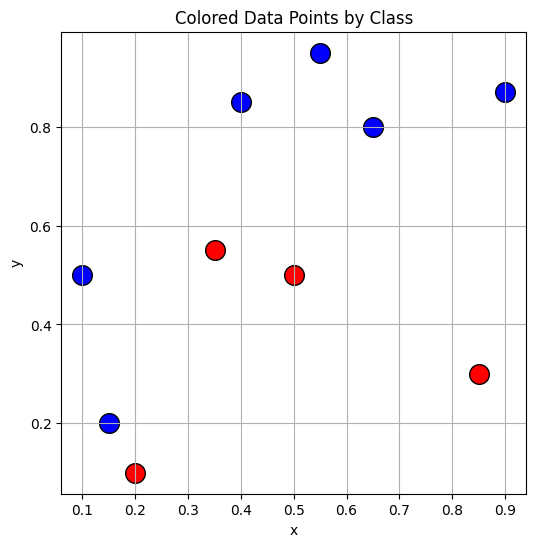

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors for classes (red and blue, similar to R code)
clr1 = np.array([[1, 0, 0, 1], [0, 0, 1, 1]])  # RGBA for red and blue

# Data points
x = np.array([.4, .55, .65, .9, .1, .35, .5, .15, .2, .85])
y = np.array([.85, .95, .8, .87, .5, .55, .5, .2, .1, .3])
z = np.array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0])  # Class labels

# Plot
plt.figure(figsize=(6, 6))
for i in range(len(x)):
    plt.scatter(x[i], y[i], s=200, color=clr1[z[i]], edgecolor='k')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Colored Data Points by Class')
plt.grid(True)
plt.show()

In [14]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Data
x = np.array([.4, .55, .65, .9, .1, .35, .5, .15, .2, .85])
y = np.array([.85, .95, .8, .87, .5, .55, .5, .2, .1, .3])
z = np.array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

# Fit logistic regression model
model = LogisticRegression()
model.fit(df[['x', 'y']], df['z'])

# Predict probabilities
probs = model.predict_proba(df[['x', 'y']])[:, 1]
print("Predicted probabilities:",probs)

Predicted probabilities: [0.64756869 0.66003442 0.63506283 0.64120151 0.59797126 0.60111444
 0.59000744 0.54748273 0.52969378 0.54987778]


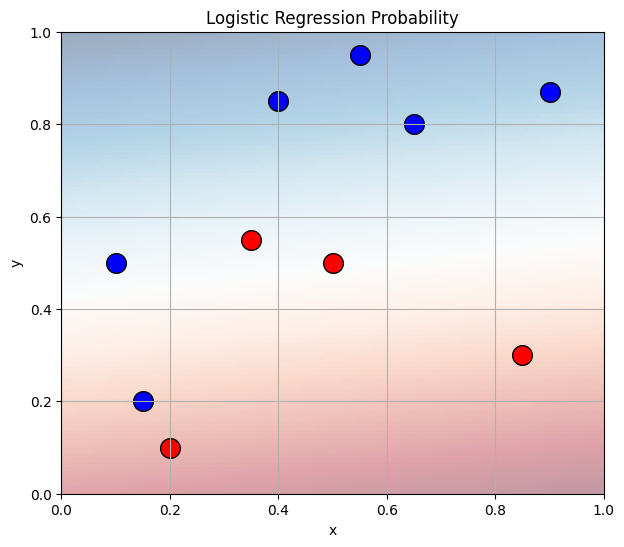

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Data
x = np.array([.4, .55, .65, .9, .1, .35, .5, .15, .2, .85])
y = np.array([.85, .95, .8, .87, .5, .55, .5, .2, .1, .3])
z = np.array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

# Colors
clr1 = np.array([[1, 0, 0, 1], [0, 0, 1, 1]])  # RGBA for red and blue
clr2 = np.array([[1, 0, 0, 0.2], [0, 0, 1, 0.2]])  # Transparent red and blue

# Fit logistic regression model
X = np.column_stack((x, y))
model = LogisticRegression()
model.fit(X, z)

# Create grid
x_grid = np.linspace(0, 1, 101)
y_grid = np.linspace(0, 1, 101)
xx, yy = np.meshgrid(x_grid, y_grid)
grid_points = np.c_[xx.ravel(), yy.ravel()]
z_grid = model.predict_proba(grid_points)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(7, 6))
plt.imshow(z_grid, extent=(0,1,0,1), origin='lower', cmap=plt.cm.RdBu, alpha=0.4, aspect='auto')
for i in range(len(x)):
    plt.scatter(x[i], y[i], s=200, color=clr1[z[i]], edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Logistic Regression Probability')
plt.grid(True)
plt.show()      

**Likelyhood of the Logistic Model**

The maximum likelihood estimation procedure is generally used to estimate the parameters of the models $\theta_0,...,\theta_d$.

$$
    p(y|x;\theta) = 
\begin{cases}
    h_\theta(x) & \text{if } y = 1 \\
    1 - h_\theta(x) & \text{if } y = 0
\end{cases}
$$

which could be written as 
$$
p(y|x;\theta) = [h_\theta(x)]^y \; [1 - h_\theta(x)]^{1-y}
$$

Consider now the observation of $m$ training samples denoted by $(x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)}) $ as iid observations from the logistic model. The likelihood is

$$
L(\theta) = \prod_{i=1}^m p(y^{(i)}|x^{(i)};\theta) = \prod_{i=1}^m [h_\theta(x^{(i)})]^{y^{(i)}} [1 - h_\theta(x^{(i)})]^{1 - y^{(i)}}
$$

Then the following log likelihood is maximized to estimates of $\theta$

$$
\ell(\theta) = \log L(\theta) = \sum_{i=1}^m \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log (1 - h_\theta(x^{(i)})) \right]
$$



**Shallow Neural Network**
The logistic model can ve viewed as a shallow Neural Network.

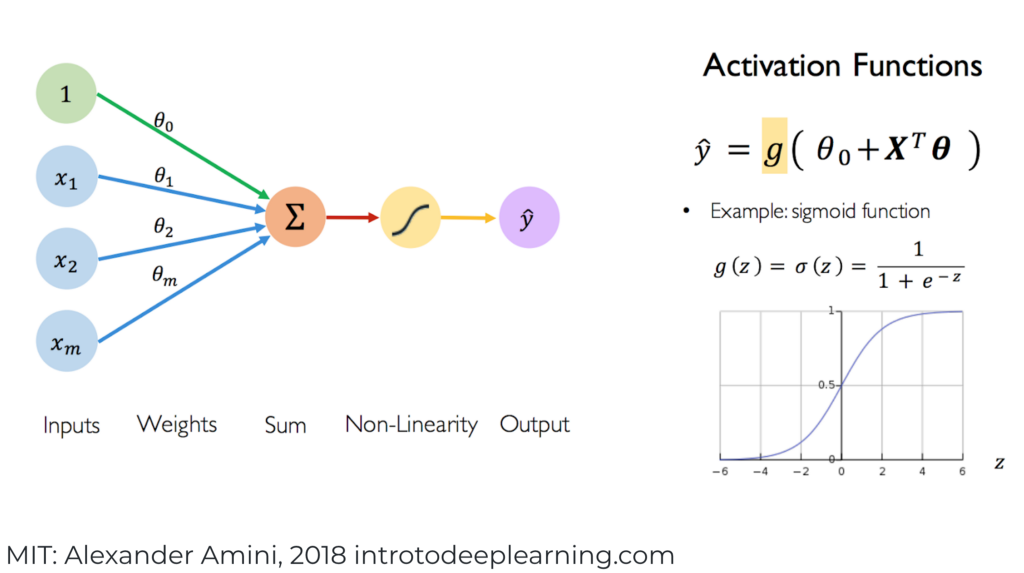

This figure used here the same notation as the regression logistic model presented by the statistical point of view. However, in the following we will adopt the notation used the most frequently in deep learning framework.

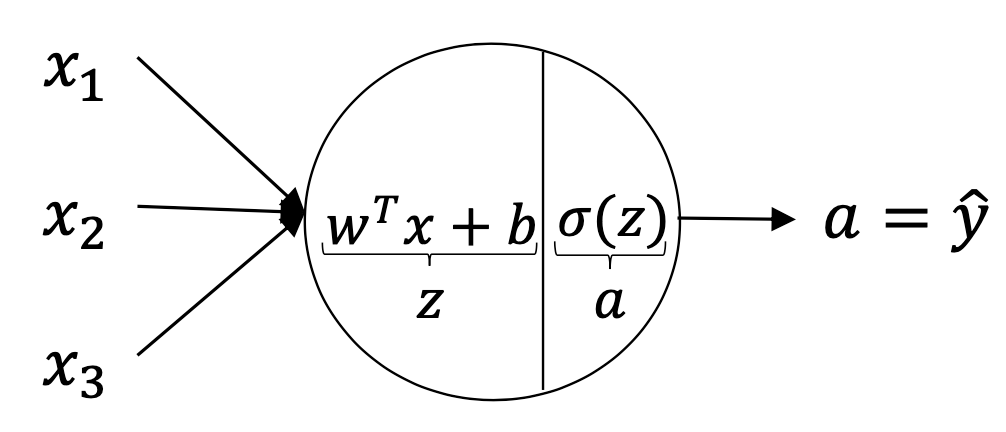

In this figure $z = w^T x + b = w_1 x_1 + w_2 x_2 + \ldots + w_d x_d + b$ is the linear combination of the d features/predictors and $a=\\sigma(Z)$ is called the activation function which is the non-linear part of the Neural Network to get a close prediction $\hat{y} \approx y$

Remark: In the sequel, we will adopt the following notation:

Let $\mathbf{x} = (x_1, \ldots, x_d)^T \in \mathbb{R}^d$ represent a vector of $d$ features or predictors.


$\mathbf{w} = (w_1, \ldots, w_d)^T$ be the vector of weights associated with the features $\mathbf{x}$.

Let $b$ be the bias term.

We consider $m$ training samples, denoted by: $\left\{ (\mathbf{x}^{(1)}, y^{(1)}), \ldots, (\mathbf{x}^{(m)}, y^{(m)}) \right\}$





**Entropy, Cross-entropy and Kullback-LeiblerCopy link**
Cross Entropy (CE) is related to the entropy and the kullback-Leibler risk.

Let $\mathbf{p} = (p_1, \ldots, p_n)$ be a discrete probability distribution, where each $p_i \geq 0$ and $\sum_{i=1}^{n} p_i = 1$.

The entropy of this distribution is defined as:
$$
H(\mathbf{p}) = -\sum_{i=1}^{n} p_i \log p_i

$$
which is a ``measurement of the disorder or randomness of a system’’.

Kullback and Leibler known also as KL divergence quantifies how similar a probability distribution 
p  is to a candidate distribution q.

The Kullback-Leibler divergence from distribution $\mathbf{p}$ to distribution $\mathbf{q}$ is defined as:
$$
D_{\text{KL}}(\mathbf{p} \parallel \mathbf{q}) = \sum_{i=1}^{n} p_i \log \left( \frac{p_i}{q_i} \right)
$$

Note that the $KL$ divergence is not a distance measure as $KL(p;q)\neq KL(q;p)$. $KL$ is non-negetive and zero if and only if $p_i= q_i \forall i$

One can easily show that

$$
    KL(p;q)=\sum_{i=1}^n p_i log\frac{1}{q_i}-H(p)
$$

where the first term of the right part is the cross entropy:
$$
    CE(p,q)=\sum_{i=1}^n log\frac{1}{q_i}= -\sum_{i=1}^n p_i log q_i
$$

And we have the relation

$$
    CE(p,q)=H(p)+KL(p;q)
$$
Thus, the cross entropy can be interpreted as the uncertainity implicit in $H(p)$ plus the lilelihooh that the distribution $p$ could  have be generated by distribution $q$.


In [5]:
import numpy as np

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid
def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Initialize weights and bias
def initialize_parameters(n_features):
    w = np.zeros((n_features, 1))  # column vector of weights
    b = 0
    return w, b

# Forward propagation
def forward_propagation(X, w, b):
    z = np.dot(X, w) + b
    a = sigmoid(z)
    return a

# Compute cost (Binary Cross-Entropy)
def compute_cost(a, y):
    m = y.shape[0]
    cost = -1/m * np.sum(y * np.log(a + 1e-8) + (1 - y) * np.log(1 - a + 1e-8))
    return cost

# Backward propagation
def backward_propagation(X, a, y):
    m = y.shape[0]
    dz = a - y
    dw = (1/m) * np.dot(X.T, dz)
    db = (1/m) * np.sum(dz)
    return dw, db

# Update parameters
def update_parameters(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

# Model training
def train(X, y, num_epochs=1000, learning_rate=0.01, print_cost=False):
    n_features = X.shape[1]
    w, b = initialize_parameters(n_features)

    for epoch in range(num_epochs):
        # Forward propagation
        a = forward_propagation(X, w, b)

        # Cost calculation
        cost = compute_cost(a, y)

        # Backward propagation
        dw, db = backward_propagation(X, a, y)

        # Update parameters
        w, b = update_parameters(w, b, dw, db, learning_rate)

        if print_cost and epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost:.4f}")

    return w, b

# Prediction
def predict(X, w, b):
    a = forward_propagation(X, w, b)
    return (a > 0.5).astype(int)

# Example usage
if __name__ == "__main__":
    # Sample data: 100 samples, 2 features
    np.random.seed(1)
    X = np.random.randn(100, 2)
    y = (np.sum(X, axis=1, keepdims=True) > 0).astype(int)  # Binary labels

    w, b = train(X, y, num_epochs=1000, learning_rate=0.1, print_cost=True)

    y_pred = predict(X, w, b)
    acc = np.mean(y_pred == y)
    print(f"\nTraining accuracy: {acc * 100:.2f}%")


Epoch 0: Cost = 0.6931
Epoch 100: Cost = 0.3152
Epoch 200: Cost = 0.2384
Epoch 300: Cost = 0.2018
Epoch 400: Cost = 0.1795
Epoch 500: Cost = 0.1641
Epoch 600: Cost = 0.1526
Epoch 700: Cost = 0.1436
Epoch 800: Cost = 0.1364
Epoch 900: Cost = 0.1303

Training accuracy: 98.00%


In [7]:
import numpy as np

class LogisticRegressionNN:
    def __init__(self, n_features, learning_rate=0.01, epochs=1000):
        self.w = np.zeros((n_features, 1))  # weight vector
        self.b = 0                          # bias
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def forward(self, X):
        return self.sigmoid(np.dot(X, self.w) + self.b)

    def compute_cost(self, a, y):
        m = y.shape[0]
        cost = -1/m * np.sum(y * np.log(a + 1e-8) + (1 - y) * np.log(1 - a + 1e-8))
        return cost

    def backward(self, X, a, y):
        m = y.shape[0]
        dz = a - y
        dw = (1/m) * np.dot(X.T, dz)
        db = (1/m) * np.sum(dz)
        return dw, db

    def update_parameters(self, dw, db):
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def fit(self, X, y, verbose=False):
        for epoch in range(self.epochs):
            a = self.forward(X)
            cost = self.compute_cost(a, y)
            dw, db = self.backward(X, a, y)
            self.update_parameters(dw, db)

            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}: Cost = {cost:.4f}")

    def predict(self, X):
        a = self.forward(X)
        return (a > 0.5).astype(int)

    def accuracy(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Example usage
if __name__ == "__main__":
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.randn(20000, 2)
    y = (np.sum(X, axis=1, keepdims=True) > 0).astype(int)

    # Train model
    model = LogisticRegressionNN(n_features=2, learning_rate=0.1, epochs=1000)
    model.fit(X, y, verbose=True)

    # Evaluate
    acc = model.accuracy(X, y)
    print(f"\nTraining Accuracy: {acc * 100:.2f}%")


Epoch 0: Cost = 0.6931
Epoch 100: Cost = 0.2811
Epoch 200: Cost = 0.2157
Epoch 300: Cost = 0.1850
Epoch 400: Cost = 0.1661
Epoch 500: Cost = 0.1530
Epoch 600: Cost = 0.1431
Epoch 700: Cost = 0.1352
Epoch 800: Cost = 0.1288
Epoch 900: Cost = 0.1235

Training Accuracy: 99.89%


In [8]:
# ...existing code...

# Evaluate
acc = model.accuracy(X, y)
print(f"\nTraining Accuracy: {acc * 100:.2f}%")

# Predict a new value
new_X = np.array([[0.5, -0.2]])  # Example input
prediction = model.predict(new_X)
print(f"Prediction for {new_X}: {prediction[0][0]}")
# ...existing


Training Accuracy: 99.89%
Prediction for [[ 0.5 -0.2]]: 1


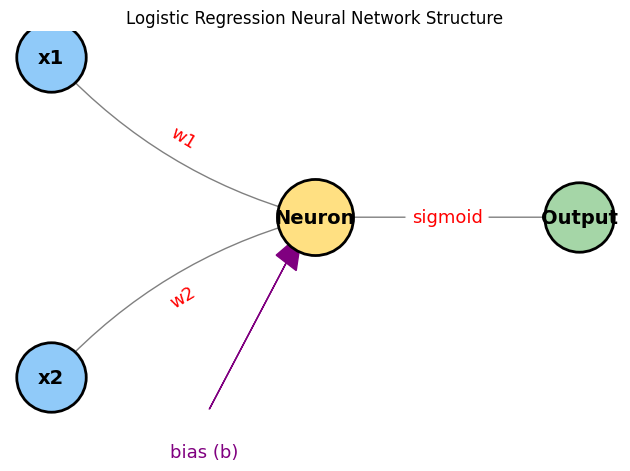

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_logistic_regression_nn():
    """
    Plots a simple neural network diagram for logistic regression (2 inputs, 1 output).
    """
    G = nx.DiGraph()
    pos = {}

    # Define nodes
    G.add_node("x1")
    G.add_node("x2")
    G.add_node("Neuron")
    G.add_node("Output")

    # Node positions
    pos["x1"] = (0, 1)
    pos["x2"] = (0, -1)
    pos["Neuron"] = (2, 0)
    pos["Output"] = (4, 0)

    # Edges (with weights and bias)
    G.add_edge("x1", "Neuron", label="w1")
    G.add_edge("x2", "Neuron", label="w2")
    G.add_edge("Neuron", "Output", label="sigmoid")

    # Draw nodes (increase node_size for bigger circles)
    nx.draw_networkx_nodes(G, pos, nodelist=["x1", "x2"], node_color="#90caf9", node_size=2500, edgecolors='k', linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=["Neuron"], node_color="#ffe082", node_size=3000, edgecolors='k', linewidths=2)
    nx.draw_networkx_nodes(G, pos, nodelist=["Output"], node_color="#a5d6a7", node_size=2500, edgecolors='k', linewidths=2)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=[("x1", "Neuron")], arrows=True, arrowstyle='-|>', arrowsize=35, edge_color='gray', connectionstyle='arc3,rad=0.15')
    nx.draw_networkx_edges(G, pos, edgelist=[("x2", "Neuron")], arrows=True, arrowstyle='-|>', arrowsize=35, edge_color='gray', connectionstyle='arc3,rad=-0.15')
    nx.draw_networkx_edges(G, pos, edgelist=[("Neuron", "Output")], arrows=True, arrowstyle='-|>', arrowsize=35, edge_color='gray')

    # Draw edge labels
    edge_labels = {("x1", "Neuron"): "w1", ("x2", "Neuron"): "w2", ("Neuron", "Output"): "sigmoid"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=13, label_pos=0.5)

    # Draw bias arrow (adjusted for better position)
    plt.arrow(1.2, -1.2, 0.7, 1.1, head_width=0.18, head_length=0.22, fc='purple', ec='purple', length_includes_head=True)
    plt.text(0.9, -1.5, "bias (b)", color='purple', fontsize=13)

    plt.title("Logistic Regression Neural Network Structure")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
plot_logistic_regression_nn()
# Call the function

In [16]:
import numpy as np

# Data
x = np.array([.4, .55, .65, .9, .1, .35, .5, .15, .2, .85])
y = np.array([.85, .95, .8, .87, .5, .55, .5, .2, .1, .3])
z = np.array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0]).reshape(-1, 1)  # Ensure column vector

X = np.column_stack((x, y))

# Use the custom LogisticRegressionNN class
model = LogisticRegressionNN(n_features=2, learning_rate=0.1, epochs=1000)
model.fit(X, z, verbose=True)

# Evaluate
acc = model.accuracy(X, z)
print(f"\nTraining Accuracy: {acc * 100:.2f}%")

# Predict probabilities for the original points
probs = model.forward(X)
print("Predicted probabilities:", probs.ravel())

# Predict class labels
preds = model.predict(X)
print("Predicted class labels:", preds.ravel())

Epoch 0: Cost = 0.6931
Epoch 100: Cost = 0.6183
Epoch 200: Cost = 0.5851
Epoch 300: Cost = 0.5586
Epoch 400: Cost = 0.5373
Epoch 500: Cost = 0.5200
Epoch 600: Cost = 0.5058
Epoch 700: Cost = 0.4941
Epoch 800: Cost = 0.4842
Epoch 900: Cost = 0.4759

Training Accuracy: 70.00%
Predicted probabilities: [0.84610886 0.86547568 0.75723391 0.7368627  0.6934745  0.65295835
 0.55366117 0.39983437 0.29655511 0.25439368]
Predicted class labels: [1 1 1 1 1 1 1 0 0 0]
